# Stock Project

I will be showing what I have lurned by first getting the data, 
then by visulalizing it and finaly predicting the next price. 

In [2]:
# imports
# pandas and numpy forcaluclations and formating data 
import pandas as pd
from pandas import Series,DataFrame
from pandas_datareader import data
import numpy as np

# For Visualzation matplot lib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') # to redues fomating each time used
 
# to print in notebook
%matplotlib inline

# For time stamps
import datetime as dt

In [3]:
# Getting the data
# whitch companys are we looking at 
#    Disney and the SNP 500
tickers = ['DIS','SPY']

In [4]:
# calling the data
# this makes DIS and SPY each a dataframe
dis_df = data.get_data_google(tickers[0])

spy_df = data.get_data_google(tickers[1])

In [5]:
# testing each case
dis_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-11-07,93.77,94.48,92.95,94.43,6996093
2016-11-08,94.53,94.85,93.90,94.38,6226852
2016-11-09,92.29,94.92,92.11,94.64,8635729
2016-11-10,94.89,96.06,94.23,94.96,13777923
2016-11-11,97.18,98.32,95.78,97.68,23008062


In [6]:
spy_df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-30,257.23,257.60,256.41,256.75,54285687
2017-10-31,257.18,257.44,256.80,257.15,60304781
2017-11-01,258.04,258.43,257.07,257.49,54202736
2017-11-02,257.41,257.75,256.19,257.59,56449535
2017-11-03,257.77,258.50,257.30,258.45,58286109


In [7]:
# To get more information about our data
dis_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-07 to 2017-11-03
Data columns (total 5 columns):
Open      250 non-null float64
High      251 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [8]:
spy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-07 to 2017-11-03
Data columns (total 5 columns):
Open      250 non-null float64
High      250 non-null float64
Low       250 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


With the .info() I am conferming that I am getting the same range of data and the same number of data points. 

In [9]:
dis_df.describe()

,Open,High,Low,Close,Volume
count,250.000000,251.000000,250.000000,251.000000,2.510000e+02
mean,105.557880,106.164223,104.974760,105.611554,7.311473e+06
std,5.363103,5.316053,5.355291,5.326800,3.388054e+06
min,92.290000,94.480000,92.110000,94.380000,4.374590e+05
25%,100.717500,101.580000,100.260000,100.745000,5.314716e+06
50%,106.075000,106.900000,105.310000,106.140000,6.492673e+06
75%,109.902500,110.325000,109.465000,110.035000,8.202376e+06
max,115.870000,116.100000,115.390000,115.840000,2.787761e+07


In [10]:
spy_df.describe()

,Open,High,Low,Close,Volume
count,250.000000,250.000000,250.000000,251.000000,2.510000e+02
mean,238.324600,238.963760,237.649440,238.457610,7.250948e+07
std,10.552734,10.412026,10.552634,10.453248,2.744778e+07
min,211.450000,213.190000,211.300000,213.150000,2.963114e+06
25%,229.405000,229.672500,228.822500,229.455000,5.609832e+07
50%,238.995000,239.550000,238.325000,238.980000,6.601589e+07
75%,246.277500,246.880000,245.495000,246.525000,8.555452e+07
max,258.040000,258.500000,257.300000,258.450000,2.584290e+08


Now that I can see the core stats of the data, I will look at the shape of the closing each day and how the two join. 

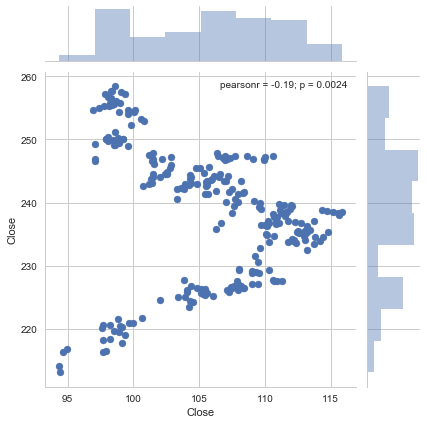

In [11]:
sns.jointplot(dis_df['Close'],spy_df['Close'],kind='scatter')

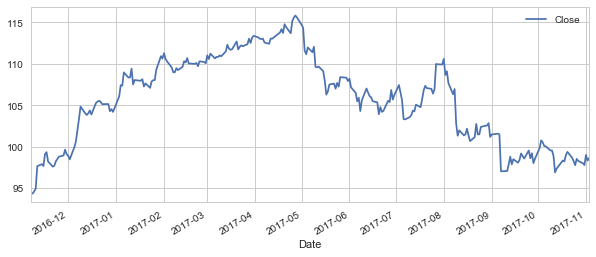

In [12]:
dis_df['Close'].plot(legend=True,figsize=(10,4))

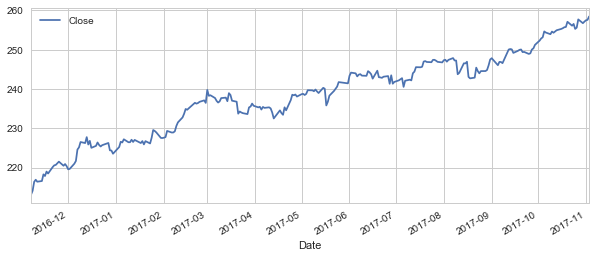

In [13]:
spy_df['Close'].plot(legend=True,figsize=(10,4))

As we see in the joint plot only tells use that the two stocks do not trend in the same way. 
So we look at each closing plot to see that trend andwe see that the SNP has a posative trend and Dinsey has more of an upsidown prolabala.

This can imply that the SNP is a safer invest ment for the long term but we also need to look at the proportionle change from the lowest 
low to the highest high to see the range and the posible growth. 

Then we will look more at disney to see what the next days closing will be.  

#####
When i have more studded more I should do sentament analysis using tweeter. 
Sharash has a video on it. 

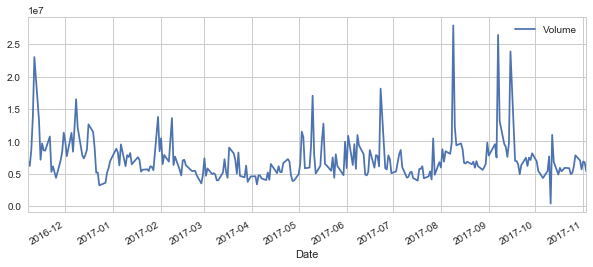

In [14]:
# To explore the data a little more before I go inanyone durenction to much 
dis_df['Volume'].plot(legend=True,figsize=(10,4))

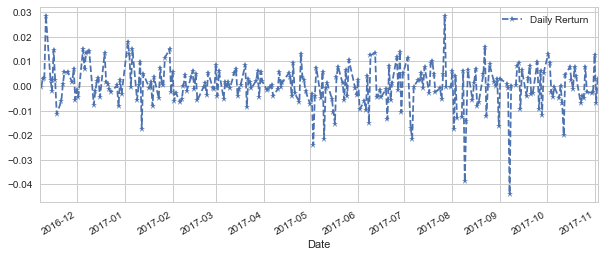

In [15]:
dis_df['Daily Rerturn'] = dis_df['Close'].pct_change()
dis_df['Daily Rerturn'].plot(figsize=(10,4),legend=True,linestyle='--',marker='*')

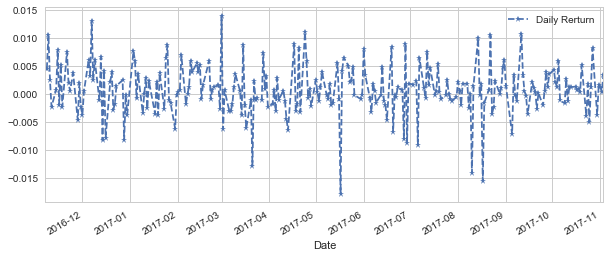

In [16]:
spy_df['Daily Rerturn'] = spy_df['Close'].pct_change()
spy_df['Daily Rerturn'].plot(figsize=(10,4),legend=True,linestyle='--',marker='*')

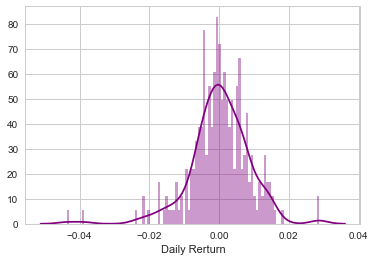

In [17]:
sns.distplot(dis_df['Daily Rerturn'].dropna(),bins=100,color='purple')

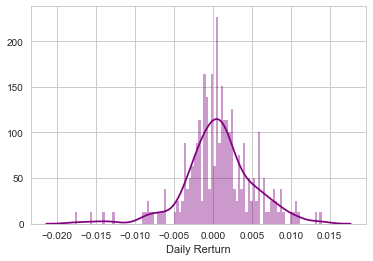

In [18]:
sns.distplot(spy_df['Daily Rerturn'].dropna(),bins=100,color='purple')

So in the two graphs above we see that the change from closing from one day to the next is a little better on avrage with the SNP 500 then Disney for the past year. 

In [19]:
end = dt.date.today()
start = dt.date(end.year-1,end.month,end.day)
closing_df = data.DataReader(tickers,'google',start,end)['Close']

In [20]:
closing_df.head()

,DIS,SPY
Date,,
2016-11-07,94.43,213.15
2016-11-08,94.38,214.11
2016-11-09,94.64,216.38
2016-11-10,94.96,216.92
2016-11-11,97.68,216.42


In [21]:
rets = closing_df.pct_change()
rets.head()

,DIS,SPY
Date,,
2016-11-07,NaN,NaN
2016-11-08,-0.000529,0.004504
2016-11-09,0.002755,0.010602
2016-11-10,0.003381,0.002496
2016-11-11,0.028644,-0.002305


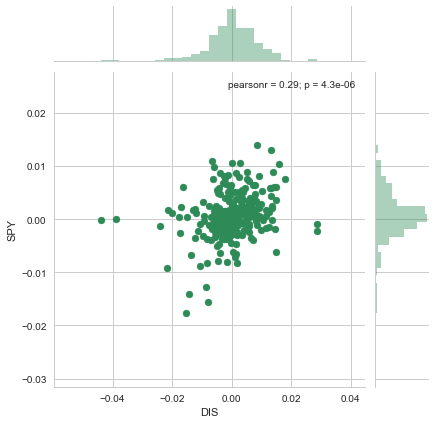

In [22]:
sns.jointplot('DIS','SPY',rets,kind = 'scatter',color='seagreen')

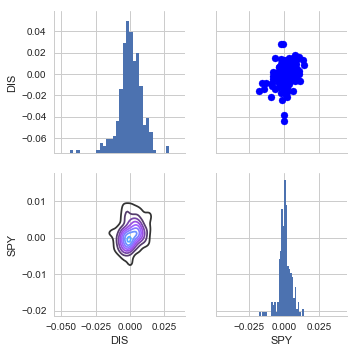

In [23]:
returns_fig = sns.PairGrid(rets.dropna())

returns_fig.map_upper(plt.scatter,color='b')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

I dind it insterstingthat the rets or witch is a percent change from closing is much closer groupingthen the closing

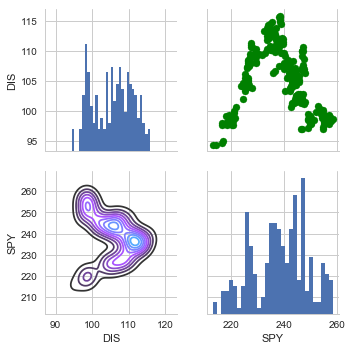

In [24]:

returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='g')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

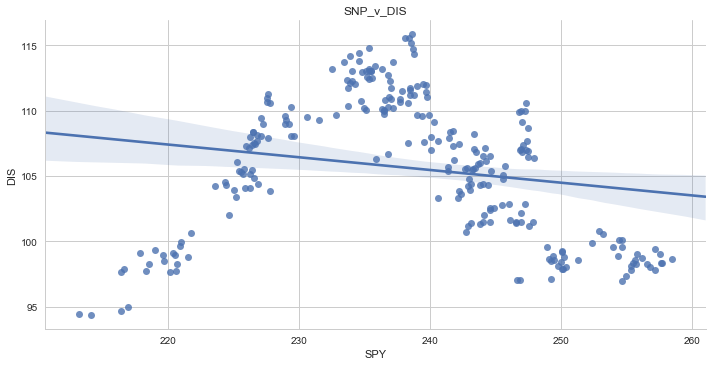

In [25]:
sns.set_style("whitegrid")
g = sns.lmplot(x='SPY',
              y='DIS',
              data=closing_df,
              aspect=2)
#g= (g.set_axis_labels("Date","Dow").set(xlim=(0,10),ylim=(0,100)))
plt.title('SNP_v_DIS')
plt.show(g)

SO this shows we are not delling with liner data so we should not use aliner model but a polynomatice one to pradict the fuecher stock

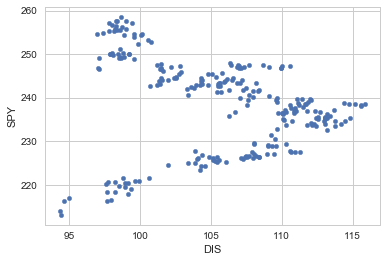

In [26]:
closing_df.plot(kind='scatter',x='DIS',y='SPY')

(array([ 0.01485205,  0.        ,  0.01856507,  0.10396438,  0.07054726,
         0.02970411,  0.04084315,  0.03341712,  0.02970411,  0.05569521,
         0.07054726,  0.06312123,  0.07797329,  0.04455616,  0.07426027,
         0.06312123,  0.05569521,  0.04084315,  0.0259911 ,  0.01856507]),
 array([  94.38 ,   95.453,   96.526,   97.599,   98.672,   99.745,
         100.818,  101.891,  102.964,  104.037,  105.11 ,  106.183,
         107.256,  108.329,  109.402,  110.475,  111.548,  112.621,
         113.694,  114.767,  115.84 ]),
 <a list of 20 Patch objects>)

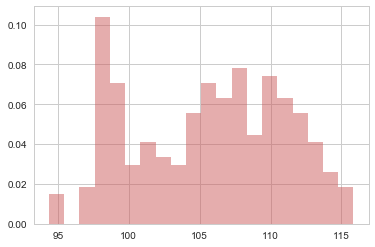

In [27]:
plt.hist(dis_df['Close'],normed=True,color='indianred',alpha=0.5,bins=20)

(array([ 0.00351794,  0.00703587,  0.01055381,  0.01583072,  0.00527691,
         0.03693834,  0.02638453,  0.00879484,  0.00703587,  0.04221524,
         0.0334204 ,  0.04221524,  0.02286659,  0.05628699,  0.0334204 ,
         0.02638453,  0.01934865,  0.00527691,  0.02462556,  0.01407175]),
 array([ 213.15 ,  215.415,  217.68 ,  219.945,  222.21 ,  224.475,
         226.74 ,  229.005,  231.27 ,  233.535,  235.8  ,  238.065,
         240.33 ,  242.595,  244.86 ,  247.125,  249.39 ,  251.655,
         253.92 ,  256.185,  258.45 ]),
 <a list of 20 Patch objects>)

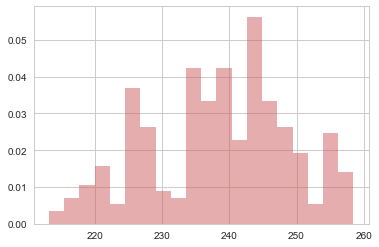

In [28]:
plt.hist(spy_df['Close'],normed=True,color='indianred',alpha=0.5,bins=20)

In [38]:
dis_df.head()

,Open,High,Low,Close,Volume,Daily Rerturn
Date,,,,,,
2016-11-07,93.77,94.48,92.95,94.43,6996093,NaN
2016-11-08,94.53,94.85,93.90,94.38,6226852,-0.000529
2016-11-09,92.29,94.92,92.11,94.64,8635729,0.002755
2016-11-10,94.89,96.06,94.23,94.96,13777923,0.003381
2016-11-11,97.18,98.32,95.78,97.68,23008062,0.028644


          DIS       SPY
DIS  1.000000  0.285962
SPY  0.285962  1.000000


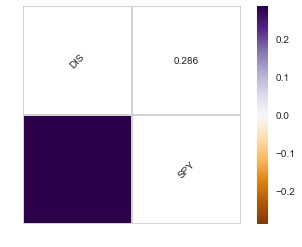

In [39]:
# lets finaly look at corrolation with a heat map
# remove all NA data
corr = rets.dropna().corr()
# Print a matrix of the corralation
print(corr)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

 This would be more interisting if we where compaing more stocks but we see with a scorre of 0.285962 that there is little to no corralation 

          DIS       SPY
DIS  1.000000 -0.191111
SPY -0.191111  1.000000


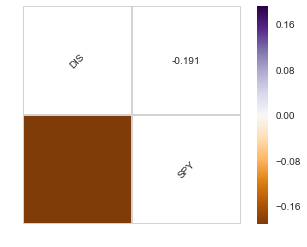

In [40]:
# now lets look at closing corr and expecting simuler reults 
corr = closing_df.corr()

print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

As said above little to no corr we would be looking for a 1 or -1 but closer to zreo impless varry littel corr

In [41]:
#  Lest analysis the risk 
ret = rets.dropna()

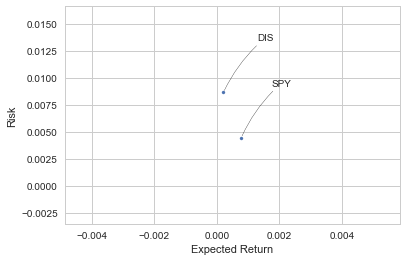

In [42]:
# this will plot a graph and show the expected risk versis the expected return
# this is extamated by looking at the mean and the standerd deviation 
area = np.pi*3

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle= 'arc3,rad=0.11'))

so we see disney has a higher riskand lower expected return, so we should probly stick with the SNP 500

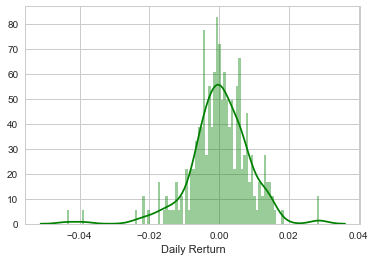

In [43]:
# lets look at the value at risk 
sns.distplot(dis_df['Daily Rerturn'].dropna(),bins=100,color='g')

In [46]:
ret['DIS'].quantile(0.05)

-0.01402302917036927

this is a negative quantile or percentile 

In [47]:
# nowwe will run a monte carlo method on ourdata of the percentile change 
# this code is taken from theclass I took on udemy
days = 365
dt = 1/days
mu = ret.mean()['DIS']
sigma = ret.std()['DIS']

In [48]:
'''     Browninan motion 
    deta(S)/S = mu*detat(t) + sigma*epsalon*sqrt(delta(t))
    deta(S) = S*(mu*detat(t) + sigma*epsalon*sqrt(delta(t)))'''

def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        # epsalone is np.random.normal
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [49]:
dis_df.head()

,Open,High,Low,Close,Volume,Daily Rerturn
Date,,,,,,
2016-11-07,93.77,94.48,92.95,94.43,6996093,NaN
2016-11-08,94.53,94.85,93.90,94.38,6226852,-0.000529
2016-11-09,92.29,94.92,92.11,94.64,8635729,0.002755
2016-11-10,94.89,96.06,94.23,94.96,13777923,0.003381
2016-11-11,97.18,98.32,95.78,97.68,23008062,0.028644


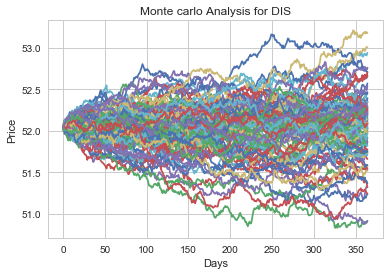

In [50]:
# start at open for first day 
start_price = 52.04

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for DIS')

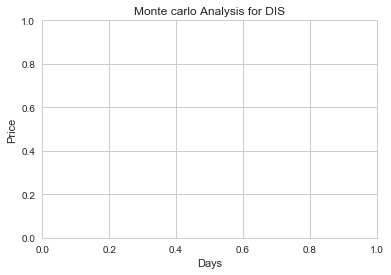

In [51]:
runs = 10000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run]= stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo Analysis for DIS')

perhapes to many triles for my computer to print to screen  

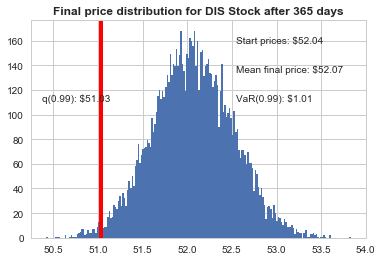

In [52]:
q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

# Start price
plt.figtext(0.6,0.8, s = "Start prices: $%.2f" % start_price)
# mean ending price
plt.figtext(0.6,0.7, "Mean final price: $%.2f" % simulation.mean())
# Varianc of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, "VaR(0.99): $%.2f" % (start_price - q))
# Disply 1% quantile
plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4,color='r')
# Title
plt.title(u"Final price distribution for DIS Stock after %s days" % days, weight='bold')

so this is showing us that we are 99% likely to loss less then \$1.01 for our investment but will likly make \$0.03

Thank you for reading my notebook. 